In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
from operator import itemgetter
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


In [2]:
def open_file_for_class_c(path):
    
    df = pd.read_csv(path, sep=",")
    df = df[["id","user.screen_name","user.id","retweeted_status.user.screen_name","retweeted_status.user.id_str"]]
    df = df.where(pd.notnull(df), None)
    df.sort_values("id", inplace = True) 
    df.drop_duplicates(subset ="id", keep = False, inplace = True)
    
    return df


In [ ]:
#!pip install --force-reinstall networkx==2.3

In [3]:
def add_edge(tweet):

    user = tweet["user.id"], tweet["user.screen_name"]
    
    if user[0] is None:
        return (None, None), []
    
    edge = set()
    edge.add((tweet["retweeted_status.user.id_str"], tweet["retweeted_status.user.screen_name"]))
    edge.discard((tweet["user.id"], tweet["user.screen_name"]))
    edge.discard((None, None))
    
    return user, edge

In [4]:

def make_graph(retweets):
  graph = nx.Graph()
  
  for index, tweet in retweets.iterrows():
    user, edge = add_edge(tweet)
    user_id, user_name = user
    tweet_id = tweet["id"]

    for x in edge:
        retweet_user_id, retweet_user_name = x
        graph.add_edge(user_id, retweet_user_id, tweet_id=tweet_id)
        graph.nodes[user_id]["name"] = user_name
        graph.nodes[retweet_user_id]["name"] = retweet_user_name

  return graph
  

In [5]:

def graph_feat(graph):

  if nx.is_connected(graph):
    print("The graph is connected")
  else:
    print("The graph is not connected")

  print(f"connected components in the Graph : {nx.number_connected_components(graph)} ")
  largest_subgraph = max(nx.connected_component_subgraphs(graph), key=len)
  print(f"Largest component have {largest_subgraph.number_of_nodes()} nodes and {largest_subgraph.number_of_edges()} edges ")
  
  return largest_subgraph

In [6]:

def centralities(largest_subgraph):

  graph_centrality = nx.degree_centrality(largest_subgraph)
  max_de = max(graph_centrality.items(), key=itemgetter(1))
  print(f"the node with id {max_de[0]} has a degree centrality of {max_de[1]:.2f} which is the maximum of the Graph")

  graph_closeness = nx.closeness_centrality(largest_subgraph)
  max_clo = max(graph_closeness.items(), key=itemgetter(1))
  print(f"the node with id {max_clo[0]} has a closeness centrality of {max_clo[1]:.2f} which is the maximum of the Graph")

  graph_betweenness = nx.betweenness_centrality(largest_subgraph, normalized=True, endpoints=False)
  max_bet = max(graph_betweenness.items(), key=itemgetter(1))
  print(f"the node with id {max_bet[0]} has a betweenness centrality of {max_bet[1]:.2f} which is the maximum of the Graph")
  
  return graph_centrality, graph_closeness, graph_betweenness
 

In [7]:
df = open_file_for_class_c('../twitter2.txt')
df

,id,user.screen_name,user.id,retweeted_status.user.screen_name,retweeted_status.user.id_str
37,1283958752274612224,iknow_facts,1123083546212487170,None,None
36,1283963411320184838,CalFactCheck,950060335620268037,iknow_facts,1.12308e+18
35,1284082643143778309,iknow_facts,1123083546212487170,None,None
34,1284084245380698114,CalFactCheck,950060335620268037,iknow_facts,1.12308e+18
33,1284303709208367105,iknow_facts,1123083546212487170,None,None
32,1284440268972810240,iknow_facts,1123083546212487170,None,None
31,1284463001471315968,ahm_Babuan_asmi,194048100,None,None
30,1284463042374193153,Justice_4OurSSR,1278304551292989441,ahm_Babuan_asmi,1.94048e+08
29,1284463497586208773,SsrAlways1,1283744857261932544,ahm_Babuan_asmi,1.94048e+08
28,1284463909601255425,siddharth8358,253429527,ahm_Babuan_asmi,1.94048e+08


In [8]:

print("both tweets graph")

t_graph = make_graph(df)
largest_subgraph_s = graph_feat(t_graph)

print("Calculating centralities")
graph_centrality, graph_closeness, graph_betweenness = centralities(largest_subgraph_s)

print("------graph_centrality-------")
print(graph_centrality)

print("-----graph_closeness-----")
print(graph_closeness)

print("-----graph_betweenness-------")
print(graph_betweenness)


both tweets graph
The graph is not connected
connected components in the Graph : 4 
Largest component have 5 nodes and 4 edges 
Calculating centralities
the node with id 194048100.0 has a degree centrality of 1.00 which is the maximum of the Graph
the node with id 194048100.0 has a closeness centrality of 1.00 which is the maximum of the Graph
the node with id 194048100.0 has a betweenness centrality of 1.00 which is the maximum of the Graph
------graph_centrality-------
{1283744857261932544: 0.25, 1278304551292989441: 0.25, 1284027547567570945: 0.25, 194048100.0: 1.0, 253429527: 0.25}
-----graph_closeness-----
{1283744857261932544: 0.5714285714285714, 1278304551292989441: 0.5714285714285714, 1284027547567570945: 0.5714285714285714, 194048100.0: 1.0, 253429527: 0.5714285714285714}
-----graph_betweenness-------
{1283744857261932544: 0.0, 1278304551292989441: 0.0, 1284027547567570945: 0.0, 194048100.0: 1.0, 253429527: 0.0}


In [9]:

def draw_largest_subgraph(largest_subgraph, nodes, central_nodes):

  node_and_degree = largest_subgraph.degree()
  colors_central_nodes = ['orange']
  

  #largest_subgraph = sorted(connected_component_subgraphs(graph), key=len, reverse=True)[0]
  pos = nx.spring_layout(largest_subgraph, k=0.05)
  plt.figure(figsize = (5,5))
  nx.draw(largest_subgraph, pos=pos, node_color=range(nodes), cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)
  nx.draw_networkx_nodes(largest_subgraph, pos=pos, nodelist=central_nodes, node_size=300, node_color=colors_central_nodes)
  plt.savefig('graphfinal.png')
  plt.show()


/home/shreya/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


NetworkXError: Node '194048100.0' has no position.

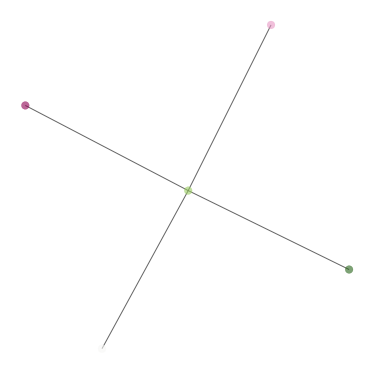

In [10]:
draw_largest_subgraph(largest_subgraph_s, 5, ['194048100.0'])

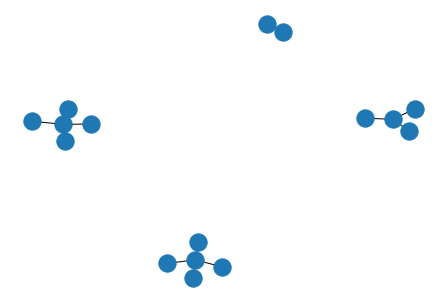

<Figure size 1440x1440 with 0 Axes>

In [12]:
nx.draw(t_graph) 
plt.figure(figsize = (20,20))
plt.savefig("filename.png") 
plt.show()

In [34]:
def smallest_graph_feat(graph):

  smallest_subgraph = min(nx.connected_component_subgraphs(graph), key=len)
  print(f"smallest component have {smallest_subgraph.number_of_nodes()} nodes and {smallest_subgraph.number_of_edges()} edges ")
  
  return smallest_subgraph

In [35]:
smallest_subgraph_s = smallest_graph_feat(t_graph)

print("Calculating centralities")
graph_centrality, graph_closeness, graph_betweenness = centralities(smallest_subgraph_s)

print("------graph_centrality-------")
print(graph_centrality)

print("-----graph_closeness-----")
print(graph_closeness)

print("-----graph_betweenness-------")
print(graph_betweenness)


smallest component have 2 nodes and 1 edges 
Calculating centralities
the node with id 1.2851877013066506e+18 has a degree centrality of 1.00 which is the maximum of the Graph
the node with id 1.2851877013066506e+18 has a closeness centrality of 1.00 which is the maximum of the Graph
the node with id 1.2851877013066506e+18 has a betweenness centrality of 0.00 which is the maximum of the Graph
------graph_centrality-------
{1.2851877013066506e+18: 1.0, 1171044742228037633: 1.0}
-----graph_closeness-----
{1.2851877013066506e+18: 1.0, 1171044742228037633: 1.0}
-----graph_betweenness-------
{1.2851877013066506e+18: 0.0, 1171044742228037633: 0.0}
